# Arvore de Decisão

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
dados = pd.read_excel('golf_df.xlsx')

In [53]:
dados.head()

,clima,temp,umidade,vento,jogar
0,sunny,hot,high,no,no
1,sunny,hot,high,yes,no
2,overcast,hot,high,no,yes
3,rainy,mild,high,no,yes
4,rainy,cool,normal,no,yes


In [54]:
dados_codificado = pd.get_dummies(dados[['clima', 'temp', 'umidade', 'vento']])
dados_codificado.head()

,clima_overcast,clima_rainy,clima_sunny,temp_cool,temp_hot,temp_mild,umidade_high,umidade_normal,vento_no,vento_yes
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0


Com os dados convertidos, temos que converter também a coluna alvo para número. 

Utilizando o conceito de função lambda visto em aulas anteriores, iremos converter a string não para 0 e a string sim para 1.

In [17]:
y = np.where(dados['jogar'] == "no", 0, 1)

Com os dados convertidos, iremos utilizar a biblioteca `scikit-learn` que já implementa o classificador - Árvore de Decisão.

In [55]:
from sklearn import tree

In [56]:
arvore_decisao = tree.DecisionTreeClassifier()

In [57]:
modelo_ad = arvore_decisao.fit(dados_codificado, y)

In [58]:
modelo_ad

DecisionTreeClassifier()

Note que por padrão utiliza-se o critério GINI para realizar a divisão.

### Criando a visualização da Árvore:

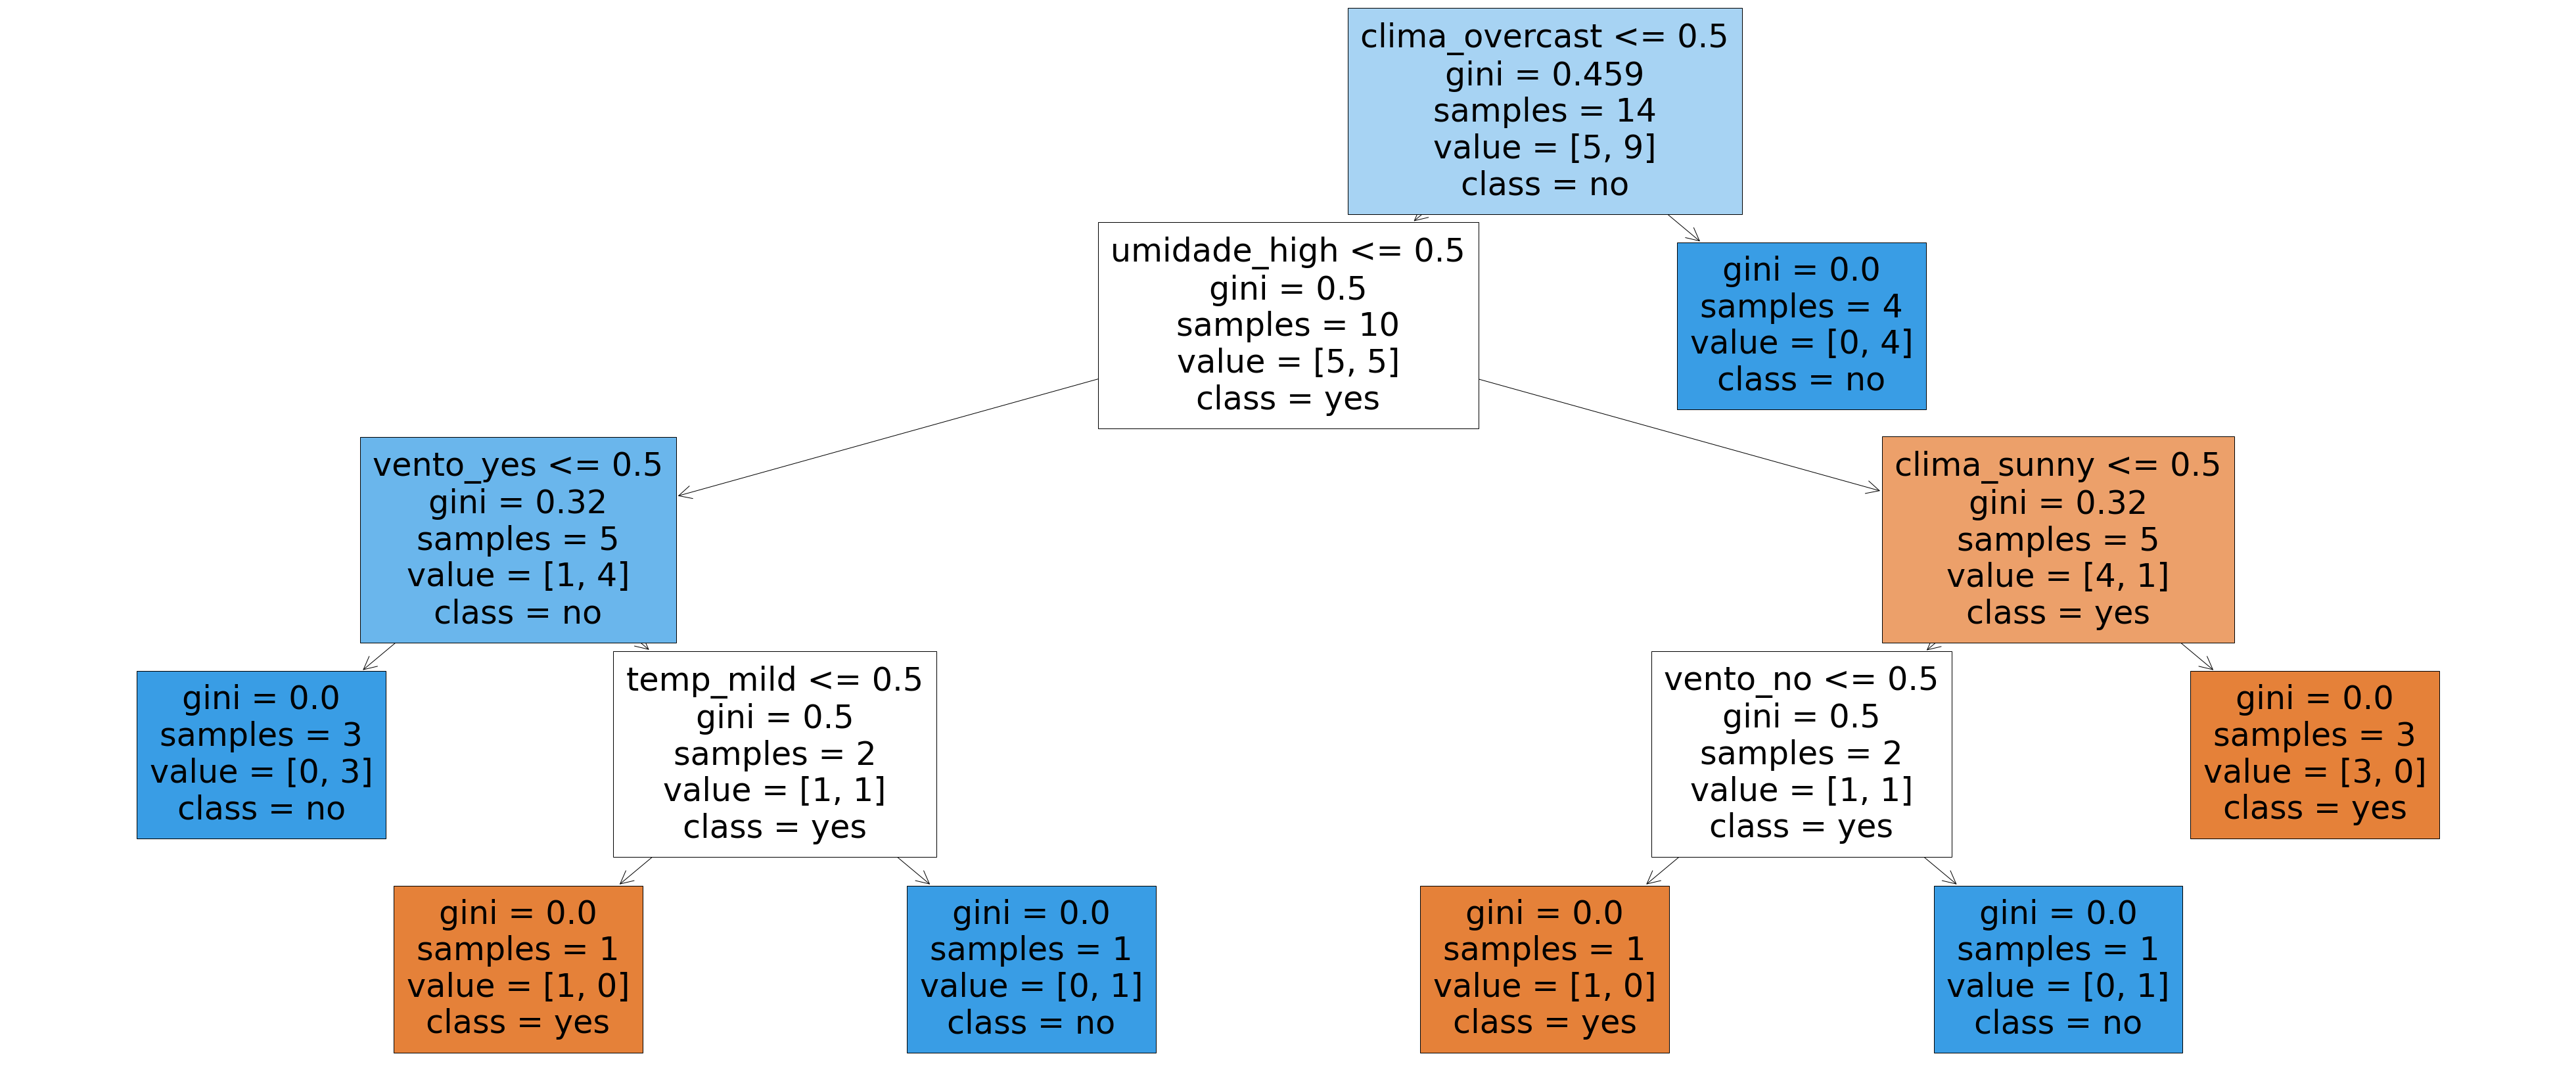

In [63]:
from sklearn import tree
fig = plt.figure(figsize=(70,30))

fig = tree.plot_tree(modelo_ad,
                   feature_names=dados_codificado.columns,
                   class_names=['yes', "no"],
                   filled=True)